In [71]:
import requests
from bs4 import BeautifulSoup # para web scraping
import spacy # para lematización
import pandas as pd 

In [72]:
#estados = ["Estado de México","Ciudad de México","Jalisco", "Veracruz", "Puebla", "Guanajuato", "Nuevo León", "Chiapas", "Michoacán", "Oaxaca"]
estados = ["Edomex","CDMX","Jalisco", "Veracruz", "Puebla", "Guanajuato", "NuevoLeon", "Chiapas", "Michoacan", "Oaxaca"]

In [73]:
links_estados = {}
def getLinks():

    with open("linksEdomex.txt", "r", encoding="utf-8") as f:
        links_estados["Edomex"] = f.readlines()
    with open("linksCDMX.txt", "r", encoding="utf-8") as f:
        links_estados["CDMX"] = f.readlines()
    with open("linksVeracruz.txt", "r", encoding="utf-8") as f:
        links_estados["Veracruz"] = f.readlines()
    with open("linksJalisco.txt", "r", encoding="utf-8") as f:
        links_estados["Jalisco"] = f.readlines()
    with open("linksPuebla.txt", "r", encoding="utf-8") as f:
        links_estados["Puebla"] = f.readlines()
    with open("linksGuanajuato.txt", "r", encoding="utf-8") as f:
        links_estados["Guanajuato"] = f.readlines()
    with open("linksNuevoLeon.txt", "r", encoding="utf-8") as f:
        links_estados["NuevoLeon"] = f.readlines()
    with open("linksChiapas.txt", "r", encoding="utf-8") as f:
        links_estados["Chiapas"] = f.readlines()
    with open("linksMichoacan.txt", "r", encoding="utf-8") as f:
        links_estados["Michoacan"] = f.readlines()
    with open("linksOaxaca.txt", "r", encoding="utf-8") as f:
        links_estados["Oaxaca"] = f.readlines()


In [ ]:
#no funcionó
getLinks() #obtener los links de los archivos de cada estado
headers = {}

# Use realistic browser headers
browser_headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/123.0.0.0 Safari/537.36"
    ),
    "Accept-Language": "en-US,en;q=0.9",
}

for estado in links_estados:
    headers_estado = []
    for url in links_estados[estado]:
        url = url.strip()
        try:
            response = requests.get(url, headers=browser_headers, timeout = 300)
            response.raise_for_status()
            soup = BeautifulSoup(response.content, "lxml")

            # Try <title> first
            title_tag = soup.find("title")
            if title_tag and title_tag.get_text(strip=True):
                title = title_tag.get_text(strip=True)
            else:
                # Fallback: Try Open Graph title
                og_title = soup.find("meta", property="og:title")
                if og_title and og_title.get("content"):
                    title = og_title["content"].strip()
                else:
                    print(f"No title found for {url}")
                    title = "No title found"

            headers_estado.append(title)

        except requests.exceptions.HTTPError as http_err:
            print(f"HTTP error for {url}: {http_err}")
        except requests.exceptions.RequestException as req_err:
            print(f"Request failed for {url}: {req_err}")
        except Exception as e:
            print(f"Unexpected error for {url}: {e}")

    headers[estado] = headers_estado

Request failed for : Invalid URL '': No scheme supplied. Perhaps you meant https://?
Request failed for : Invalid URL '': No scheme supplied. Perhaps you meant https://?
Request failed for : Invalid URL '': No scheme supplied. Perhaps you meant https://?
Request failed for : Invalid URL '': No scheme supplied. Perhaps you meant https://?
Request failed for : Invalid URL '': No scheme supplied. Perhaps you meant https://?
Request failed for : Invalid URL '': No scheme supplied. Perhaps you meant https://?
Request failed for : Invalid URL '': No scheme supplied. Perhaps you meant https://?
Request failed for : Invalid URL '': No scheme supplied. Perhaps you meant https://?
Request failed for : Invalid URL '': No scheme supplied. Perhaps you meant https://?
No title found for https://imagendelgolfo.mx/xalapa/laboratorios-privados-en-xalapa-no-aplican-pruebas-de-coronavirus/50003054
No title found for https://imagendelgolfo.mx/estado/por-coronavirus-permanecen-cerradas-instalaciones-del-cr

KeyboardInterrupt: 

In [ ]:
#este si
getLinks() #obtener los links de los archivos de cada estado
headers = {}

# Use realistic browser headers
browser_headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/123.0.0.0 Safari/537.36"
    ),
    "Accept-Language": "en-US,en;q=0.9",
}

for estado in links_estados:
    headers_estado = []
    for url in links_estados[estado]:
        url = url.strip()
        try:
            response = requests.get(url, headers=browser_headers, timeout = 300)
            response.raise_for_status()
            soup = BeautifulSoup(response.content, "lxml")

            # Try <title> first
            title_tag = soup.find("title")
            if title_tag and title_tag.get_text(strip=True):
                title = title_tag.get_text(strip=True)
            else:
                # Fallback: Try Open Graph title
                og_title = soup.find("meta", property="og:title")
                if og_title and og_title.get("content"):
                    title = og_title["content"].strip()
                else:
                    print(f"No title found for {url}")
                    title = "No title found"

            headers_estado.append(title)

        except requests.exceptions.HTTPError as http_err:
            print(f"HTTP error for {url}: {http_err}")
        except requests.exceptions.RequestException as req_err:
            print(f"Request failed for {url}: {req_err}")
        except Exception as e:
            print(f"Unexpected error for {url}: {e}")

    headers[estado] = headers_estado

No title found for https://imagendelgolfo.mx/xalapa/laboratorios-privados-en-xalapa-no-aplican-pruebas-de-coronavirus/50003054
No title found for https://imagendelgolfo.mx/estado/por-coronavirus-permanecen-cerradas-instalaciones-del-crit-poza-rica/50008231
No title found for https://imagendelgolfo.mx/estado/ayuntamiento-de-orizaba-reducira-personal-por-covid-19/50003748
No title found for https://imagendelgolfo.mx/estado/plaza-valle-cierra-sus-puertas-por-covid-19-en-orizaba/50005746
No title found for https://imagendelgolfo.mx/estado/refuerza-tec-de-alamo-acciones-contra-el-coronavirus/50006342
No title found for https://imagendelgolfo.mx/estado/exhortan-en-poza-rica-a-transportistas-cuidar-medidas-sanitarias/50009928
No title found for https://imagendelgolfo.mx/estado/mantiene-semar-acciones-de-vigilancia-por-pandemia-en-tuxpan/50010906
No title found for https://imagendelgolfo.mx/estado/planta-akwel-detiene-operaciones-en-el-centro-de-veracruz/50005795
No title found for https://ima

In [ ]:
#issue con una pagina de veracruz
# Use realistic browser headers
browser_headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/123.0.0.0 Safari/537.36"
    ),
    "Accept-Language": "en-US,en;q=0.9",
}

estado = "Veracruz"
headers_estado = []

for url in links_estados[estado]:
    url = url.strip()
    if not url.startswith("http"):
        print(f"Invalid URL skipped: {url}")
        continue

    try:
        response = requests.get(url, headers=browser_headers, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, "lxml")

        # Try <title> tag
        title_tag = soup.find("title")
        if title_tag and title_tag.get_text(strip=True):
            title = title_tag.get_text(strip=True)
        elif soup.title and soup.title.string:
            title = soup.title.string.strip()
        else:
            # Try Open Graph title
            og_title = soup.find("meta", property="og:title")
            if og_title and og_title.get("content"):
                title = og_title["content"].strip()
            else:
                # Try Twitter title
                twitter_title = soup.find("meta", attrs={"name": "twitter:title"})
                if twitter_title and twitter_title.get("content"):
                    title = twitter_title["content"].strip()
                else:
                    print(f"No title found for {url}")
                    title = "No title found"

        headers_estado.append(title)

    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error for {url}: {http_err}")
    except requests.exceptions.RequestException as req_err:
        print(f"Request failed for {url}: {req_err}")
    except Exception as e:
        print(f"Unexpected error for {url}: {e}")

headers[estado] = headers_estado

In [ ]:
#debugging
k_errores = {}
k_errores["Error 404"] = 0
k_errores["Bad Request"] = 0
k_errores["403 Forbidden"] = 0


for head in headers:
    print(head)
    errors = 0

    c = 1

    for l in headers[head]:
        if "Error 404" in l or "Bad Request" in l or "403 Forbidden" in l:
            if "Error 404" in l:
                k_errores['Error 404'] += 1
            if "Bad Request" in l:
                k_errores['Bad Request'] += 1
            if "403 Forbidden" in l:
                k_errores['403 Forbidden'] += 1

            errors += 1
        
        print(c, l)
        c += 1

    print(head, errors, "errores")
    print("-----------------------------------------------------------------")

for i in k_errores:
    print(i, k_errores[i])

Edomex
1 Edomex, entre los estados con más perdida de empleos por Covid-19 - El Sol de Toluca | Noticias Locales, Policiacas, sobre México, Edomex y el Mundo
2 Ajustará Edomex su presupuesto para atender crisis por Covid-19 - El Sol de Toluca | Noticias Locales, Policiacas, sobre México, Edomex y el Mundo
3 Aumentan a 2 mil 355 los casos positivos a Covid-19 en el Edomex - El Sol de Toluca | Noticias Locales, Policiacas, sobre México, Edomex y el Mundo
4 Temas - El Sol de Toluca | Noticias Locales, Policiacas, sobre México, Edomex y el Mundo
5 Edomex registra 10 casos de COVID-19 - El Sol de Toluca | Noticias Locales, Policiacas, sobre México, Edomex y el Mundo
6 Aumentan a mil 992 los casos positivos de Covid-19 en el Edomex - El Sol de Toluca | Noticias Locales, Policiacas, sobre México, Edomex y el Mundo
7 Temas - El Sol de Toluca | Noticias Locales, Policiacas, sobre México, Edomex y el Mundo
8 Burlan municipios mexiquenses protocolo contra Covid-19 y Viernes Santo - El Sol de Tolu

In [10]:
#creamos todos los archivos para guardar la información de los headers
#Sólo se corre una vez
for i in headers:
    name = "headers" + i + ".txt"
    with open(name, "w", encoding="utf-8") as f:
        for head in headers[i]:
            f.write(head + "\n")

In [11]:
file_names = []
for i in estados:
    file_names.append("headers" + i +".txt")

In [121]:
#después de terminar de limpiar manualmente los datos, actualizamos las variables
#Consideramos que la información está en los archivos, ya sin correr el scrapping
#Volvemos a declarar el map de headers, para manipular más fácil

headers = {}

for filename in file_names:
    with open(filename, "r", encoding="utf-8") as f:
        state = filename.removeprefix("headers").removesuffix(".txt")
        headers[state] = [line.strip() for line in f if line.strip()]

for i in headers:
    print(i)
    for k in headers[i]:
        print(k)


Edomex
Edomex, entre los estados con más perdida de empleos por Covid-19
Ajustará Edomex su presupuesto para atender crisis por Covid-19
Aumentan a 2 mil 355 los casos positivos a Covid-19 en el Edomex
Edomex registra 10 casos de COVID-19
Aumentan a mil 992 los casos positivos de Covid-19 en el Edomex
Burlan municipios mexiquenses protocolo contra Covid-19 y Viernes Santo
Habilitan línea telefónica para recibir quejas del personas de Salud en el Edomex
Correos de México no lo detiene el COVID-19
Suspenden visitas familiares en el penal de Cuautitlán por casos sospechosos de Covid-19
Suspenden actividades tianguis del Edomex por COVID-19
Personal del SUEM, capacitados para el traslado de pacientes con COVID-19
Sin confirmar 19 posibles casos de Covid-19 de reos mexiquenses
Xonacatlán confirma primer caso positivo de COVID-19
Sostienen gobernadores y gabinete federal videoconferencia por COVID-19
Cierran presidencia de Los Reyes La Paz por positivo a Covid-19
Sin cambios los tianguis en 

In [74]:
import spacy
from nltk.stem.snowball import SpanishStemmer

# Load spaCy Spanish model and NLTK Spanish stemmer
nlp = spacy.load("es_core_news_sm")
stemmer = SpanishStemmer()

def lemmatize_and_stem(text, remove_stopwords=True):
    doc = nlp(text)
    result = []

    for token in doc:
        if token.is_punct or token.is_space:
            continue

        if remove_stopwords and token.is_stop:
            continue

        lemma = token.lemma_.lower()
        stem = stemmer.stem(lemma)

        result.append(stem)

    return result


In [14]:
d = []
for i in range(0, 10):
    d.append({})
    
palabras_estado = dict(zip(estados, d))

# Load Spanish model
nlp = spacy.load("es_core_news_sm")

for estado in headers:
    for header in headers[estado]:
        lmm_hedaer = lemmatize_and_stem(header.lower())

        for l in lmm_hedaer:
            if l.isdigit():
                continue  # Skip numbers and mixed tokens
            
            if l not in palabras_estado[estado]:
                palabras_estado[estado][l] = 1
            else:
                palabras_estado[estado][l] += 1

    palabras_estado[estado] = dict(sorted(palabras_estado[estado].items(), key=lambda x: x[1], reverse=True))  # By value, descending

    





In [15]:
#creamos todos los archivos para guardar la información de los headers
#Sólo se corre una vez
for estado in palabras_estado:
    name = "palabras" + estado + ".txt"
    with open(name, "w", encoding="utf-8") as f:
        for palabra in palabras_estado[estado]:
            f.write(palabra + "," + str(palabras_estado[estado][palabra]) + '\n')



In [16]:
all_words = dict()
for estado in headers:
    for k in palabras_estado[estado]:
        if k not in all_words:
            all_words[k] = 0
        
        all_words[k] += palabras_estado[estado][k]


#ordenar las palabras más frecuentes
all_words_sorted = dict(sorted(all_words.items(), key=lambda x: x[1], reverse=True))  # By value, descending

for l in all_words_sorted:
    print(l, all_words_sorted[l])




covid-19 373
coronavirus 235
cas 115
mexic 82
hospital 80
pandemi 79
cerr 78
puebl 57
contingent 54
salud 51
med 49
san 43
suspend 40
contagi 37
cdmx 34
cuarenten 33
imss 32
medic 31
veracruz 29
atend 28
sanitari 28
leon 28
map 27
cov 25
ped 24
sant 24
pacient 24
merc 23
oaxac 23
trabaj 22
emergent 22
activ 21
personal 21
pes 21
covid19 21
abril 20
public 20
chiap 20
fas 19
michoacan 19
municipi 18
centr 18
guadalaj 18
call 17
transport 17
oms 17
pobl 17
edomex 16
servici 16
apoy 16
penal 15
posit 15
aplic 15
ofrec 15
distanci 15
mil 14
priv 14
viv 14
enfrent 14
general 14
prevent 14
virus 14
covid–19 14
moreli 14
person 13
confirm 13
visit 13
prevencion 13
atencion 13
cubreboc 13
agu 13
line 12
evit 12
restring 12
pas 12
polic 12
econom 12
seman 12
fallec 12
cancel 12
cruz 12
jalisc 12
toluc 11
vall 11
falt 11
tianguis 11
mexican 11
emple 11
registr 11
luc 11
mor 11
indigen 11
equip 11
año 11
instal 11
clas 11
marz 10
aument 10
negoci 10
sum 10
entreg 10
deten 10
famili 10
clinic 10
p

In [128]:
#Datos de COVID en cada estado, del 15 de marzo al 27 de septiembre del 2020
cases_map = {
    "CDMX": 137501,
    "Chiapas": 7390,
    "Edomex": 92902,
    "Guanajuato": 41434,
    "Jalisco": 27896,
    "Michoacan": 21406,
    "NuevoLeon": 40857,
    "Oaxaca": 18176,
    "Puebla": 32927,
    "Veracruz": 34650
}

poblacion_mexico_2020 = {
    "Chiapas": 5_543_828,
    "Guanajuato": 6_166_934,
    "Jalisco": 8_348_151,
    "CDMX": 9_209_944,
    "Edomex": 16_992_418,
    "Michoacan": 4_748_846,
    "NuevoLeon": 5_784_442,
    "Oaxaca": 4_132_148,
    "Puebla": 6_583_278,
    "Veracruz": 8_062_579,
}

percentage_infected = {}

for estado in estados:
    percentage_infected[estado] = cases_map[estado] * 100 / poblacion_mexico_2020[estado]



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords

spanish_stopwords = stopwords.words('spanish')

# 1. Prepare state-wise documents
documents = [" ".join(headers[estado]) for estado in estados]

print(documents)

['Edomex, entre los estados con más perdida de empleos por Covid-19\n Ajustará Edomex su presupuesto para atender crisis por Covid-19\n Aumentan a 2 mil 355 los casos positivos a Covid-19 en el Edomex\n Edomex registra 10 casos de COVID-19\n Aumentan a mil 992 los casos positivos de Covid-19 en el Edomex\n Burlan municipios mexiquenses protocolo contra Covid-19 y Viernes Santo\n Habilitan línea telefónica para recibir quejas del personas de Salud en el Edomex\n Correos de México no lo detiene el COVID-19 \n Suspenden visitas familiares en el penal de Cuautitlán por casos sospechosos de Covid-19\n Suspenden actividades tianguis del Edomex por COVID-19\n Personal del SUEM, capacitados para el traslado de pacientes con COVID-19\n Sin confirmar 19 posibles casos de Covid-19 de reos mexiquenses\n Xonacatlán confirma primer caso positivo de COVID-19 \n Sostienen gobernadores y gabinete federal videoconferencia por COVID-19\n Cierran presidencia de Los Reyes La Paz por positivo a Covid-19\n S

In [69]:
# 2. TF-IDF with Spanish stopwords, filtering out words that appear in <2 states
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words=spanish_stopwords,
    min_df = 5  # must appear in at least 2 documents (states)
)


tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

# 3. Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=estados, columns=feature_names)

# 4. Add COVID case target
tfidf_df["covid_cases"] = tfidf_df.index.map(percentage_infected)

tfidf_df


,10,19,25,30,abasto,acceso,actividad,actividades,agua,apoyo,...,tres,universidades,van,ventas,vida,violencia,virus,vive,zona,covid_cases
Edomex,0.013963,0.596228,0.015446,0.015446,0.030891,0.012679,0.013963,0.023093,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.013963,0.000000,0.000000,0.000000,0.546726
CDMX,0.029430,0.618206,0.016277,0.000000,0.032555,0.013362,0.014715,0.000000,0.000000,0.016277,...,0.029430,0.000000,0.016277,0.016277,0.000000,0.000000,0.048832,0.016277,0.032555,1.492962
Jalisco,0.000000,0.607172,0.000000,0.000000,0.000000,0.013802,0.015200,0.000000,0.000000,0.033628,...,0.030400,0.000000,0.016814,0.016814,0.000000,0.015200,0.084069,0.000000,0.016814,0.334158
Veracruz,0.000000,0.557251,0.000000,0.000000,0.000000,0.022960,0.025285,0.062726,0.000000,0.083908,...,0.050570,0.000000,0.000000,0.027969,0.000000,0.025285,0.000000,0.000000,0.055939,0.429763
Puebla,0.015839,0.545439,0.000000,0.017521,0.000000,0.000000,0.000000,0.013098,0.105126,0.017521,...,0.015839,0.017521,0.000000,0.000000,0.017521,0.000000,0.000000,0.000000,0.000000,0.500161
Guanajuato,0.030323,0.584740,0.033542,0.000000,0.000000,0.000000,0.030323,0.075223,0.000000,0.000000,...,0.030323,0.033542,0.067084,0.000000,0.067084,0.000000,0.000000,0.000000,0.000000,0.671874
NuevoLeon,0.023068,0.333632,0.051034,0.051034,0.025517,0.020947,0.000000,0.019075,0.051034,0.025517,...,0.000000,0.000000,0.025517,0.000000,0.025517,0.023068,0.076551,0.025517,0.000000,0.706326
Chiapas,0.030353,0.522604,0.000000,0.033575,0.000000,0.027561,0.000000,0.025099,0.100725,0.000000,...,0.091058,0.033575,0.000000,0.033575,0.033575,0.060705,0.000000,0.033575,0.033575,0.133301
Michoacan,0.000000,0.613958,0.000000,0.070436,0.035218,0.000000,0.031838,0.052654,0.035218,0.000000,...,0.000000,0.035218,0.000000,0.000000,0.000000,0.000000,0.070436,0.105654,0.000000,0.450762
Oaxaca,0.000000,0.584636,0.044715,0.000000,0.022357,0.018353,0.000000,0.016713,0.067072,0.000000,...,0.000000,0.022357,0.022357,0.022357,0.044715,0.020211,0.022357,0.022357,0.022357,0.439868


Cross-validated R^2: -3733.217372707973
Top 5 important words and their importance values:
casa
contagio
cierran
evitar
entrega
crisis
vive
zona
virus
violencia
transporte
trabajo
vida
ventas
van
universidades
tres
tras
suspende
sucursales
servicios
servicio
semana
santa
sanitarias
sanitaria
sana
san
tianguis
temen
taxistas
suspensión
suspender
suspenden
primer
preventivas
positivo
poder
plena
piden
pide
pese
personas
personal
parque
pandemia
pacientes
ofrece
nueva
negocios
méxico
médicos
médico
municipios
mundo
mujeres
mil
mercados
mercado
medidas
salud
riesgo
reportan
público
protección
privados
insumos
juárez
luce
línea
mar
medida
horas
imss
gobierno
general
federal
frente
fase
hacer
hospitales
hoy
estudiantes
eventos
enfrentar
equipo
economía
dos
distancia
emergencia
dan
da
cubrebocas
cómo
cuarentena
falta
guerrero
hospital
coronavirus
covid


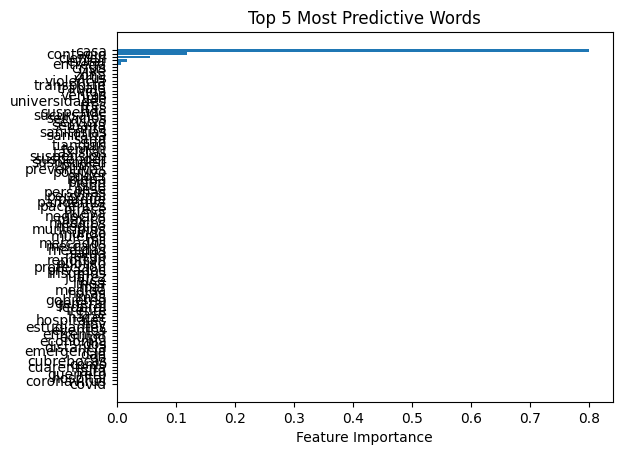

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Assuming `tfidf_df` and `feature_names` are already defined

# 5. Split features and target
X = tfidf_df.drop(columns=["covid_cases"])
y = tfidf_df["covid_cases"]

# Optional: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Train Decision Tree Regressor
reg = DecisionTreeRegressor(max_depth=4, random_state=42)
reg.fit(X_scaled, y)

# 7. Evaluate (cross-validation)
scores = cross_val_score(reg, X_scaled, y, cv=5, scoring='r2')
print("Cross-validated R^2:", scores.mean())

# 8. Show top features (important words)
importances = reg.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances

# Top 5 important words
top_words = [feature_names[i] for i in indices[:100]]  # Top 5 words
top_importances = importances[indices[:100]]

# Print top 5 important words and their importances
print("Top 5 important words and their importance values:")
for word, importance in zip(top_words, top_importances):
    print(f"{word}")

# Plot the top 5 important words
plt.barh(top_words[::-1], top_importances[::-1])
plt.title("Top 5 Most Predictive Words")
plt.xlabel("Feature Importance")
plt.show()


In [131]:
from transformers import pipeline

# Load the sentiment analysis pipeline with BETO fine-tuned
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

d = {i: 0 for i in range(1, 6)}

scores = {}
for estado in estados:
    scores[estado] = d.copy()

total_score_state = {}

for estado in estados:
    total_score = 0
    print("//", estado)
    scored_headers = {}

    results = classifier(headers[estado])
    
    for result in results:
        label = result["label"]
        score = int(label[0])
        scores[estado][score] += 1

        total_score += int(score)
        #print(i)
    
    total_score_state[estado] = total_score

    print("score:", total_score)


Device set to use cpu


// Edomex
score: 288
// CDMX
score: 343
// Jalisco
score: 303
// Veracruz
score: 225
// Puebla
score: 279
// Guanajuato
score: 316
// NuevoLeon
score: 333
// Chiapas
score: 314
// Michoacan
score: 270
// Oaxaca
score: 285


In [133]:



# Convert scores dict to DataFrame
df_scores = pd.DataFrame.from_dict(scores, orient='index')
df_scores = df_scores[[1, 2, 3, 4, 5]]

df_scores["Casos COVID"] = df_scores.index.map(cases_map)
df_scores['Poblacion_total'] = df_scores.index.map(poblacion_mexico_2020)
df_scores['Porcentaje_contagiado'] = df_scores['Casos COVID'] * 100/df_scores['Poblacion_total']

df_scores



,1,2,3,4,5,Casos COVID,Poblacion_total,Porcentaje_contagiado
Edomex,64,1,7,24,21,92902,16992418,0.546726
CDMX,53,6,4,19,38,137501,9209944,1.492962
Jalisco,56,5,8,22,25,27896,8348151,0.334158
Veracruz,50,2,3,23,14,34650,8062579,0.429763
Puebla,70,4,3,18,24,32927,6583278,0.500161
Guanajuato,47,6,3,27,28,41434,6166934,0.671874
NuevoLeon,53,3,5,26,31,40857,5784442,0.706326
Chiapas,53,7,8,17,31,7390,5543828,0.133301
Michoacan,37,6,6,17,27,21406,4748846,0.450762
Oaxaca,62,3,4,25,21,18176,4132148,0.439868


In [122]:
for state in headers:
    print(headers[state])

['Edomex, entre los estados con más perdida de empleos por Covid-19', 'Ajustará Edomex su presupuesto para atender crisis por Covid-19', 'Aumentan a 2 mil 355 los casos positivos a Covid-19 en el Edomex', 'Edomex registra 10 casos de COVID-19', 'Aumentan a mil 992 los casos positivos de Covid-19 en el Edomex', 'Burlan municipios mexiquenses protocolo contra Covid-19 y Viernes Santo', 'Habilitan línea telefónica para recibir quejas del personas de Salud en el Edomex', 'Correos de México no lo detiene el COVID-19', 'Suspenden visitas familiares en el penal de Cuautitlán por casos sospechosos de Covid-19', 'Suspenden actividades tianguis del Edomex por COVID-19', 'Personal del SUEM, capacitados para el traslado de pacientes con COVID-19', 'Sin confirmar 19 posibles casos de Covid-19 de reos mexiquenses', 'Xonacatlán confirma primer caso positivo de COVID-19', 'Sostienen gobernadores y gabinete federal videoconferencia por COVID-19', 'Cierran presidencia de Los Reyes La Paz por positivo a 

In [123]:
import spacy
from nltk.stem.snowball import SpanishStemmer
from collections import defaultdict
from transformers import pipeline

# Load models
nlp = spacy.load("es_core_news_sm")
stemmer = SpanishStemmer()
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

def lemmatize_and_stem(text, remove_stopwords=True):
    doc = nlp(text)
    result = []

    for token in doc:
        if token.is_punct or token.is_space:
            continue
        if remove_stopwords and token.is_stop:
            continue

        lemma = token.lemma_.lower()
        stem = stemmer.stem(lemma)
        result.append(stem)

    return result

def score_header(stemmed_tokens):
    text = " ".join(stemmed_tokens)  # Join tokens back into string
    score = classifier(text)[0]['label']  # e.g. '1 star'
    # Extract numeric part only
    return int(score[0])

# Ensure headers is a dictionary
score_headers = defaultdict(lambda: defaultdict(int))  # score_headers[state][score] = count

for state in headers:
    for header in headers[state]:
        stemmed_header = lemmatize_and_stem(header)
        score = score_header(stemmed_header)
        score_headers[state][score] += 1

# Display
for state in score_headers:
    print(state)
    print(score_headers[state])


Device set to use cpu


Edomex
defaultdict(<class 'int'>, {1: 64, 4: 19, 5: 16, 3: 17, 2: 1})
CDMX
defaultdict(<class 'int'>, {1: 56, 4: 15, 5: 30, 3: 19})
Jalisco
defaultdict(<class 'int'>, {1: 47, 5: 29, 2: 2, 3: 22, 4: 16})
Veracruz
defaultdict(<class 'int'>, {1: 38, 5: 21, 3: 19, 2: 1, 4: 13})
Puebla
defaultdict(<class 'int'>, {1: 62, 5: 25, 3: 20, 4: 9, 2: 3})
Guanajuato
defaultdict(<class 'int'>, {1: 45, 5: 37, 3: 20, 4: 9})
NuevoLeon
defaultdict(<class 'int'>, {3: 16, 1: 56, 5: 33, 4: 13})
Chiapas
defaultdict(<class 'int'>, {5: 32, 4: 9, 3: 21, 1: 54})
Michoacan
defaultdict(<class 'int'>, {5: 26, 1: 40, 3: 15, 2: 2, 4: 10})
Oaxaca
defaultdict(<class 'int'>, {1: 55, 4: 17, 5: 24, 2: 2, 3: 17})


In [130]:
# Create a sorted list of unique states and scores (1 to 5)
all_states = sorted(score_headers.keys())
all_scores = [1, 2, 3, 4, 5]

# Build the dataframe
data = []
for state in all_states:
    row = []
    for score in all_scores:
        row.append(score_headers[state].get(score, 0))  # Get count, or 0 if missing
    data.append(row)

df_scores_headers = pd.DataFrame(data, columns=[s for s in all_scores], index=all_states)
df_scores_headers['Porcentaje de contagios'] = cases_map[estado] * 100 / poblacion_mexico_2020[estado]

print(df_scores_headers)

             1  2   3   4   5  Porcentaje de contagios
CDMX        56  0  19  15  30                 0.439868
Chiapas     54  0  21   9  32                 0.439868
Edomex      64  1  17  19  16                 0.439868
Guanajuato  45  0  20   9  37                 0.439868
Jalisco     47  2  22  16  29                 0.439868
Michoacan   40  2  15  10  26                 0.439868
NuevoLeon   56  0  16  13  33                 0.439868
Oaxaca      55  2  17  17  24                 0.439868
Puebla      62  3  20   9  25                 0.439868
Veracruz    38  1  19  13  21                 0.439868


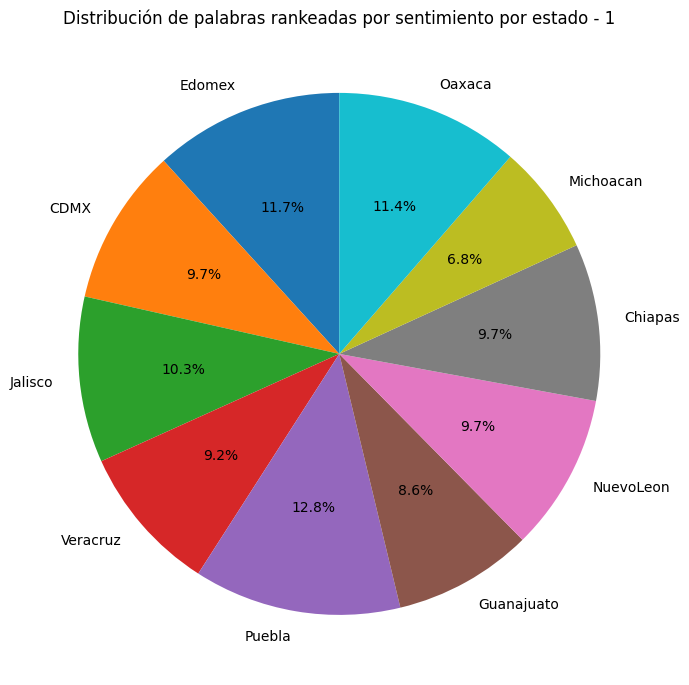

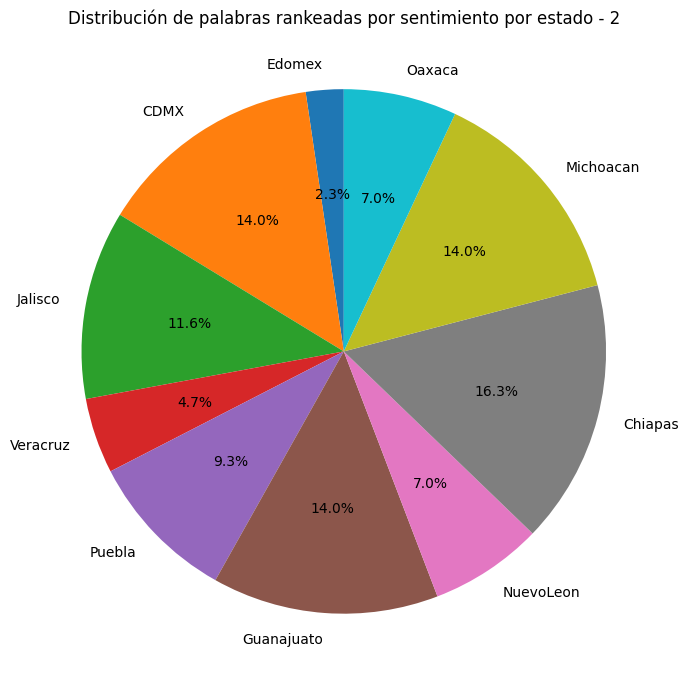

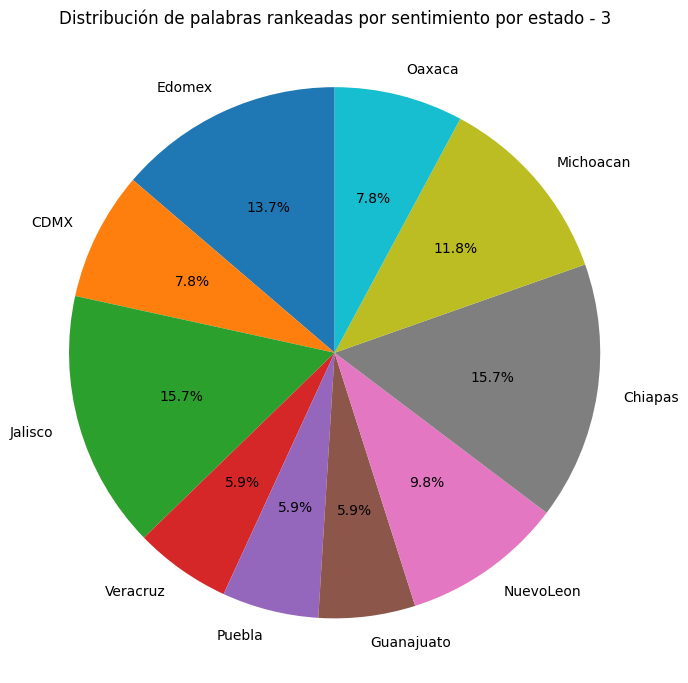

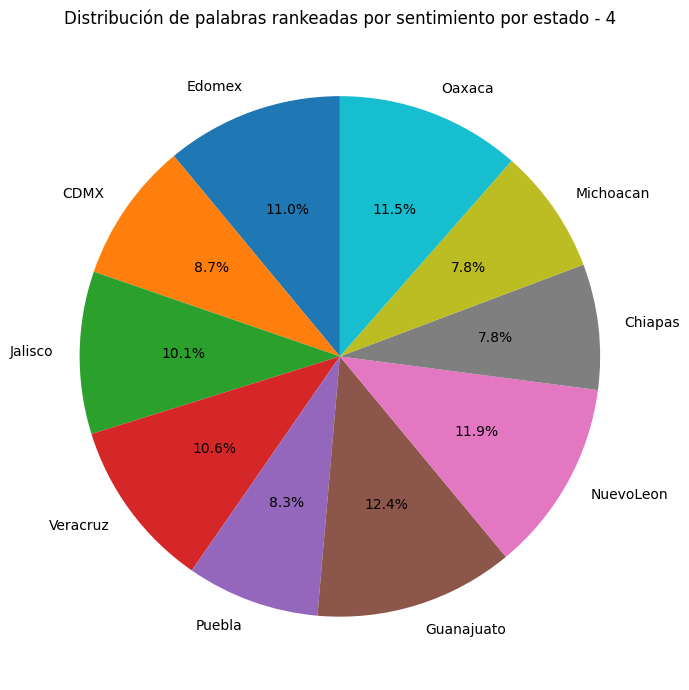

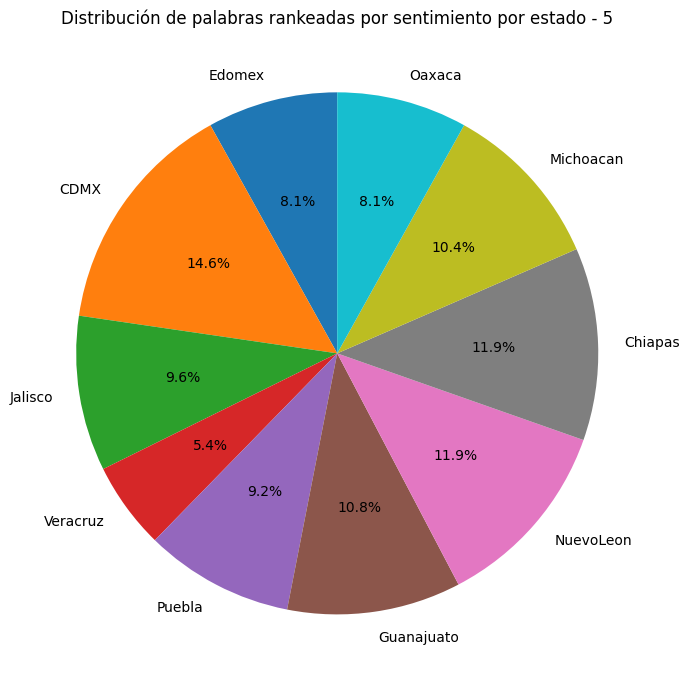

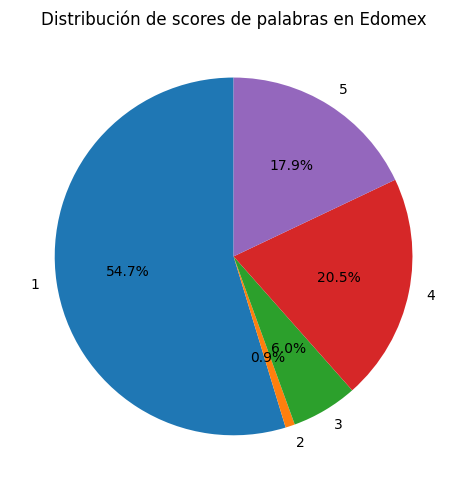

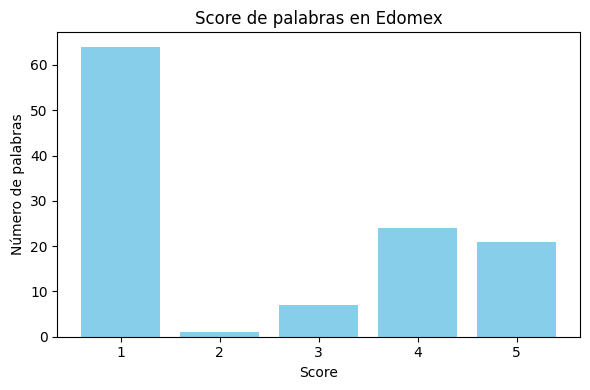

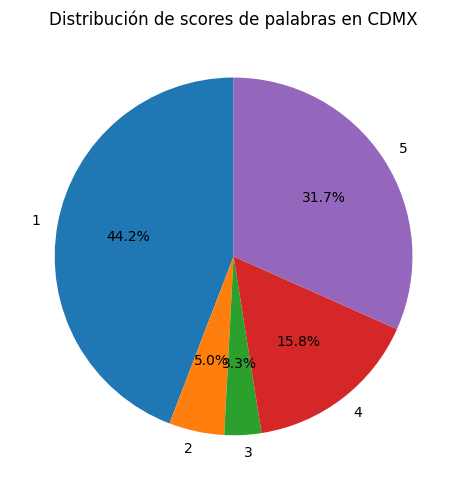

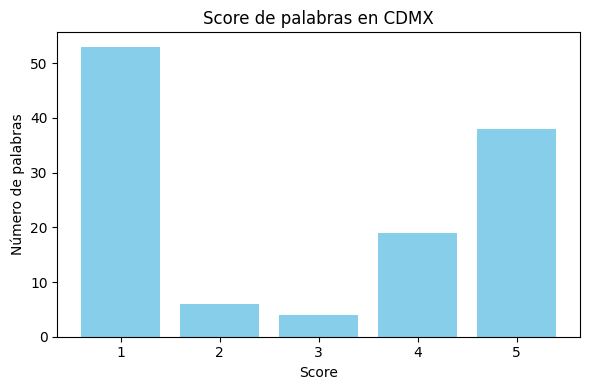

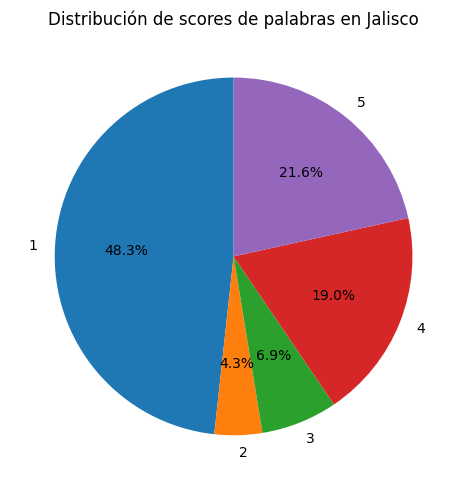

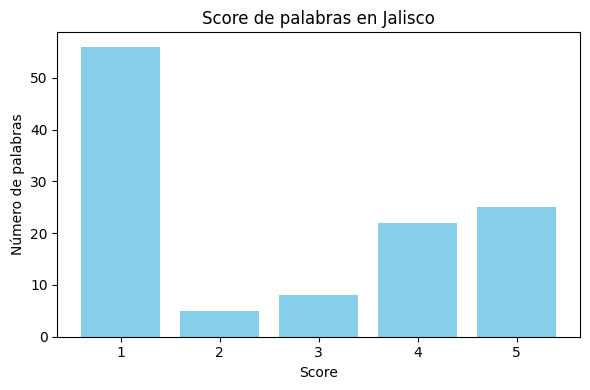

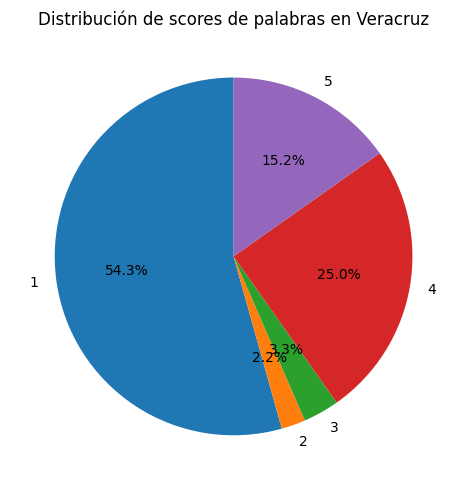

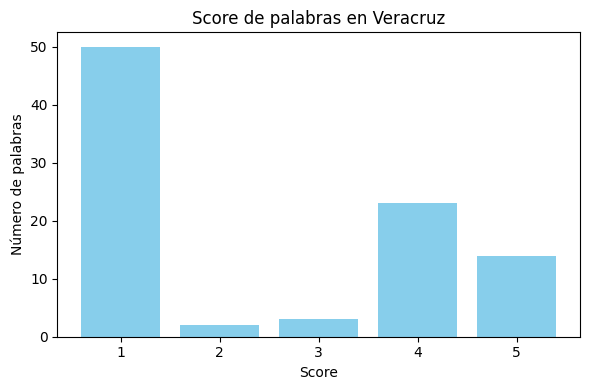

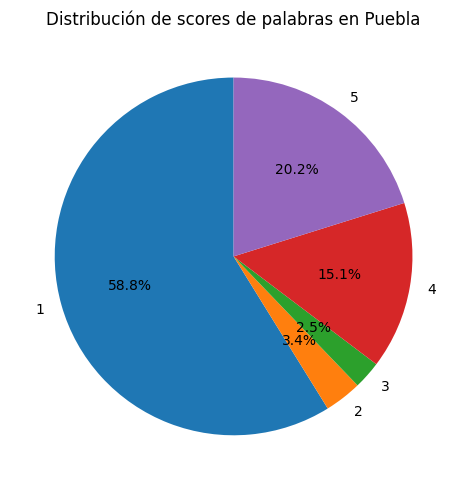

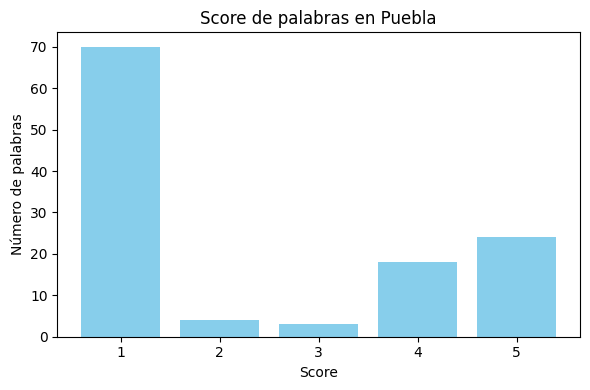

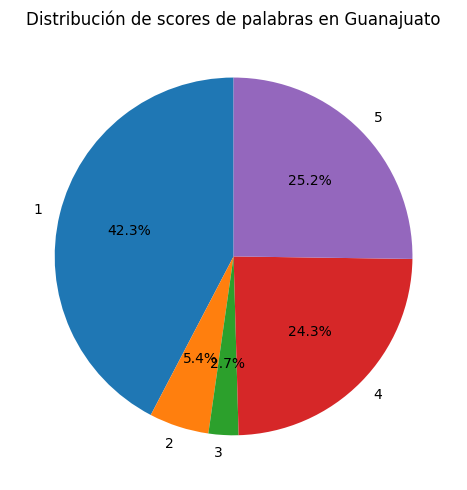

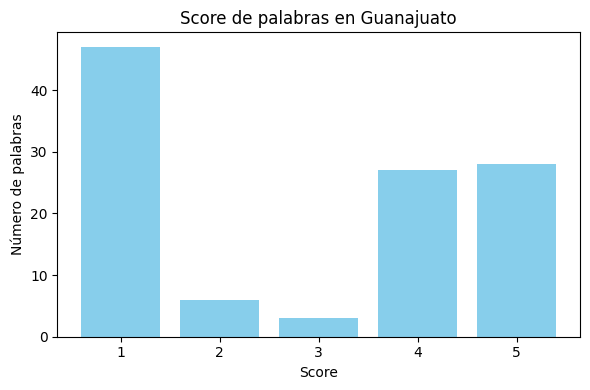

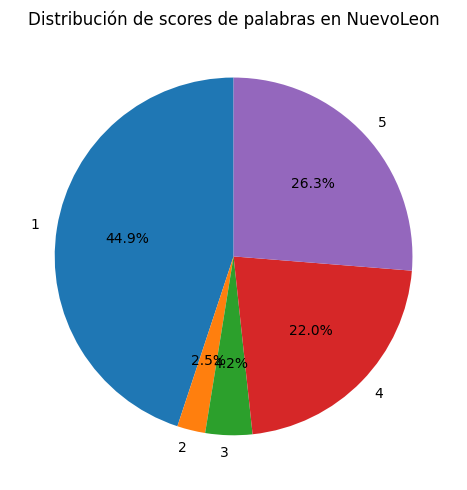

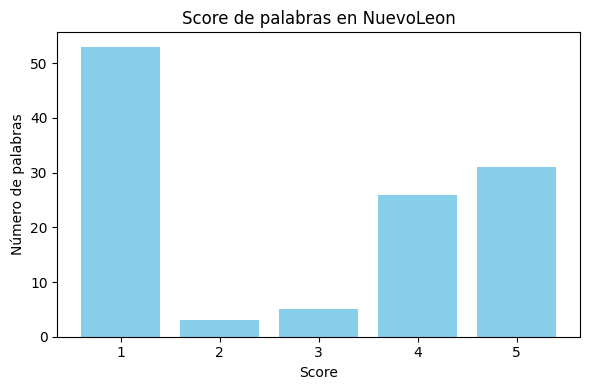

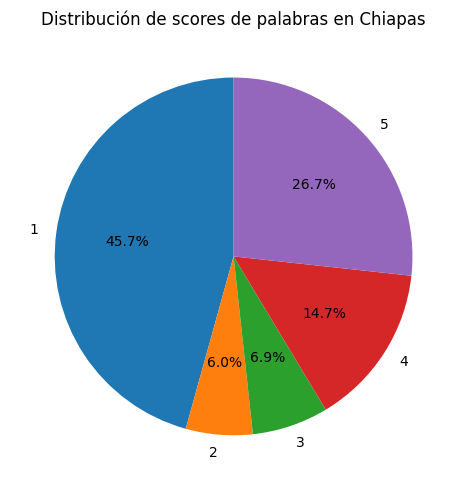

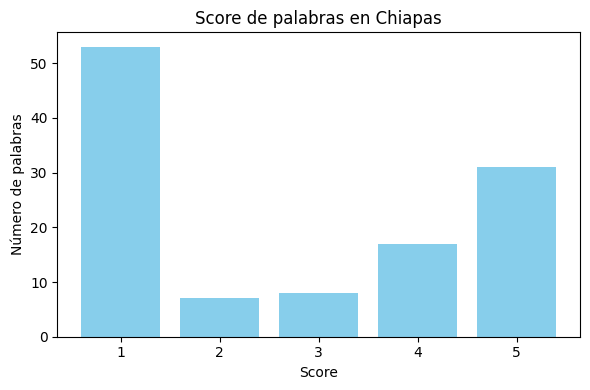

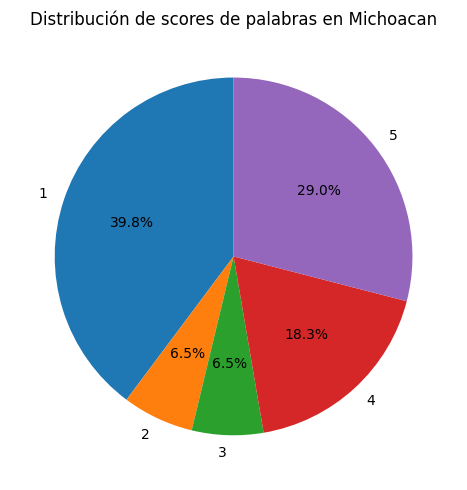

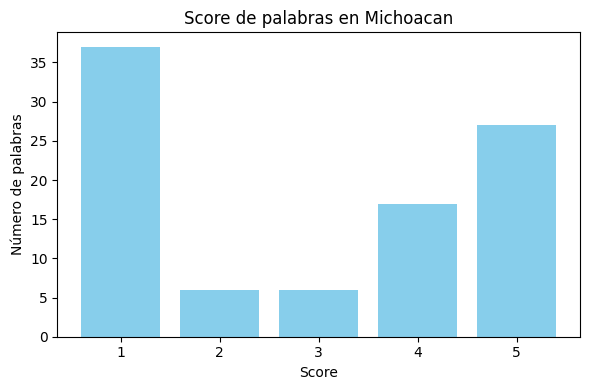

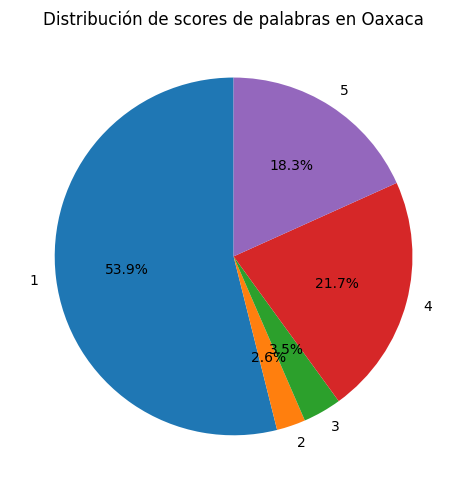

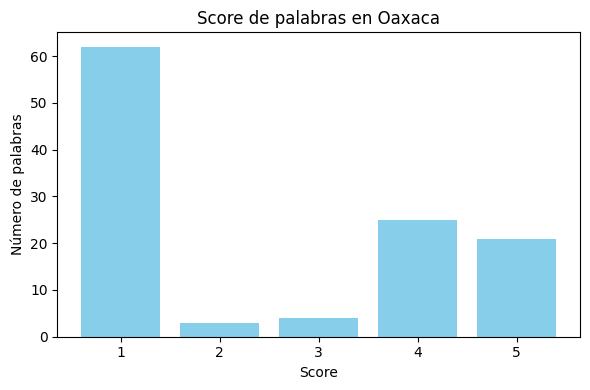

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

for score in df_scores.columns[:5]:
    sales = df_scores[score]
    plt.figure(figsize=(7, 7))
    plt.pie(sales, labels = df_scores.index, autopct="%1.1f%%", startangle=90)
    plt.title(f"Distribución de palabras rankeadas por sentimiento por estado - {score}")
    plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    plt.show()

df_graph = df_scores.iloc[:, :5]

# Loop through each state to create plots
for state in df_graph.index:
    state_scores = df_graph.loc[state]

    plt.figure(figsize=(5, 5))
    plt.pie(state_scores, labels = df_graph.columns, autopct='%1.1f%%', startangle=90)
    plt.title(f"Distribución de scores de palabras en {state}")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.bar(df_graph.columns, state_scores, color='skyblue')
    plt.title(f"Score de palabras en {state}")
    plt.xlabel("Score")
    plt.ylabel("Número de palabras")
    plt.tight_layout()
    plt.show()



In [80]:
df_scores_sorted = df_scores.sort_values(by = "Porcentaje_contagiado", ascending=False)
df_scores_sorted


,1,2,3,4,5,Casos COVID,Poblacion_total,Porcentaje_contagiado
CDMX,53,6,4,19,38,137501,9209944,1.492962
NuevoLeon,53,3,5,26,31,40857,5784442,0.706326
Guanajuato,47,6,3,27,28,41434,6166934,0.671874
Edomex,64,1,7,24,21,92902,16992418,0.546726
Puebla,70,4,3,18,24,32927,6583278,0.500161
Michoacan,37,6,6,17,27,21406,4748846,0.450762
Oaxaca,62,3,4,25,21,18176,4132148,0.439868
Veracruz,50,2,3,23,14,34650,8062579,0.429763
Jalisco,56,5,8,22,25,27896,8348151,0.334158
Chiapas,53,7,8,17,31,7390,5543828,0.133301


R² score: 0.8811043545734928
RMSE: 0.00851669975674077


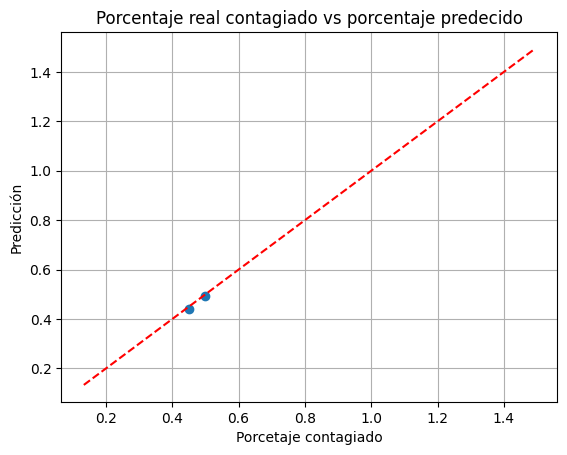

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error
import matplotlib.pyplot as plt

X = df_scores[[5, 2]]
y = df_scores['Porcentaje_contagiado']

# 3. Train/test split (optional, but good for validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 54)

model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("R² score:", r2)
print("RMSE:", rmse)

# 7. (Optional) Plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("Porcetaje contagiado")
plt.ylabel("Predicción")
plt.title("Porcentaje real contagiado vs porcentaje predecido")
plt.grid()
plt.show()

In [108]:
# Predict red shoes using the full dataset (not just test)
y_all_true = df_scores['Porcentaje_contagiado']
X_all = df_scores[[5, 2]]
y_all_pred = model.predict(X_all)

# Plot: Actual vs Predicted (all states)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_all_true, y_all_pred, alpha=0.8)
plt.plot([y_all_true.min(), y_all_true.max()],
         [y_all_true.min(), y_all_true.max()], 'r--', label='Ideal Prediction')
plt.xlabel("Porcentaje de contagiados")
plt.ylabel("Predicción de porcentaje de contagios")
plt.title("Linear Regression Model (All States)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: X has 2 features, but LinearRegression is expecting 5 features as input.

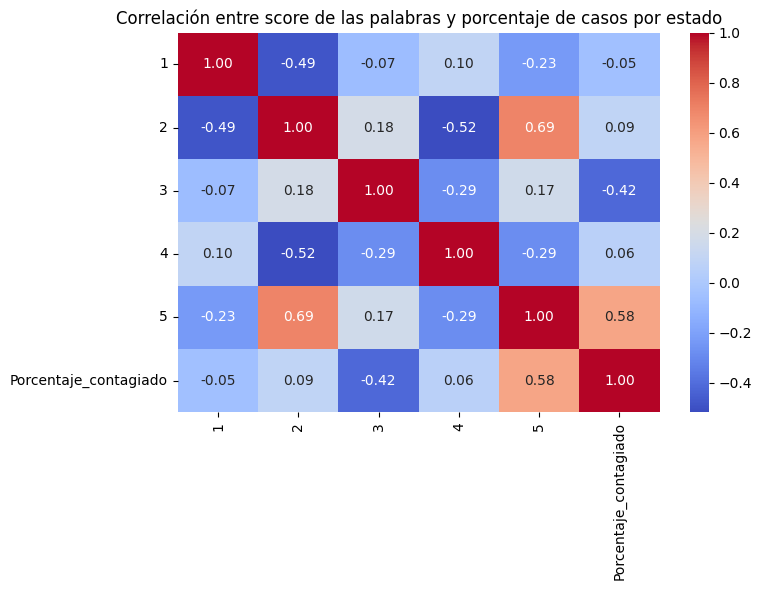

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
corr_df = df_scores[[1, 2, 3, 4, 5, 'Porcentaje_contagiado']]

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Display correlation matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación entre score de las palabras y porcentaje de casos por estado")
plt.tight_layout()
plt.show()
#hay correlacion entre porcentaje y palabras con score 5

Equation: y ≈ 0.05×Score5 + -0.11×Score6 + -0.36


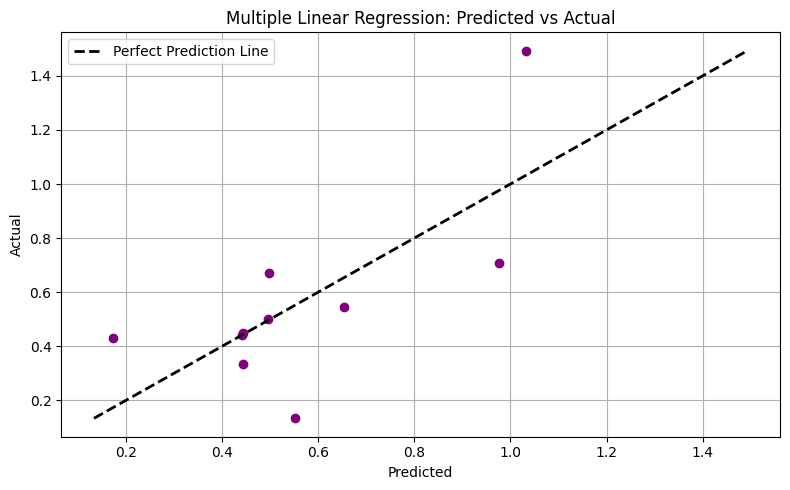

R² score: 0.510
RMSE: 0.241


In [ ]:
#dado que 5 se relaciona con porcentaje y 2 co 5, usamos esos dos
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# 1. Define X and y with two features (e.g., scores 5 and 6)
X_multi = df_scores[[5, 2]]  # You can choose any two relevant columns
y_porcentaje = df_scores['Porcentaje_contagiado']

# 2. Train the model
multi_model = LinearRegression()
multi_model.fit(X_multi, y_porcentaje)

# 3. Predict
y_pred = multi_model.predict(X_multi)

# 4. Print model coefficients
coefs = multi_model.coef_
intercept = multi_model.intercept_
print(f"Equation: y ≈ {coefs[0]:.2f}×Score5 + {coefs[1]:.2f}×Score6 + {intercept:.2f}")

# 5. Plot (scatter plot only works well for 1 variable, so we skip regression line)
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, y_porcentaje, color="purple")
plt.plot([y_porcentaje.min(), y_porcentaje.max()],
         [y_porcentaje.min(), y_porcentaje.max()],
         'k--', lw=2, label="Perfect Prediction Line")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Multiple Linear Regression: Predicted vs Actual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Evaluate model
r2 = r2_score(y_porcentaje, y_pred)
rmse = root_mean_squared_error(y_porcentaje, y_pred)

print(f"R² score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")


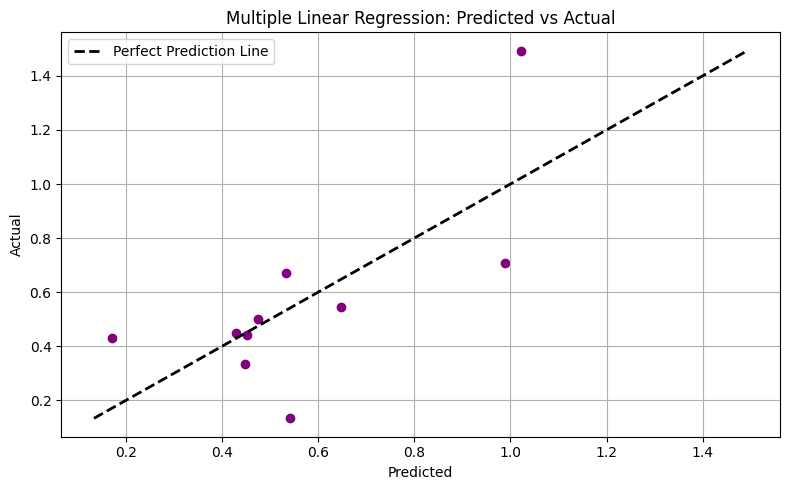

R² score: 0.512
RMSE: 0.240


In [ ]:
#dado que 5 se relaciona con porcentaje y 2 co 5, usamos esos dos
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# 1. Define X and y with two features (e.g., scores 5 and 6)
X_multi = df_scores[[5, 2, 1]]  # You can choose any two relevant columns
y_porcentaje = df_scores['Porcentaje_contagiado']

# 2. Train the model
multi_model = LinearRegression()
multi_model.fit(X_multi, y_porcentaje)

# 3. Predict
y_pred = multi_model.predict(X_multi)

# 4. Print model coefficients
coefs = multi_model.coef_
intercept = multi_model.intercept_
#print(f"Equation: y ≈ {coefs[0]:.2f}×Score5 + {coefs[1]:.2f}×Score6 + {intercept:.2f}")

# 5. Plot (scatter plot only works well for 1 variable, so we skip regression line)
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, y_porcentaje, color="purple")
plt.plot([y_porcentaje.min(), y_porcentaje.max()],
         [y_porcentaje.min(), y_porcentaje.max()],
         'k--', lw=2, label="Perfect Prediction Line")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Multiple Linear Regression: Predicted vs Actual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Evaluate model
r2 = r2_score(y_porcentaje, y_pred)
rmse = root_mean_squared_error(y_porcentaje, y_pred)

print(f"R² score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")


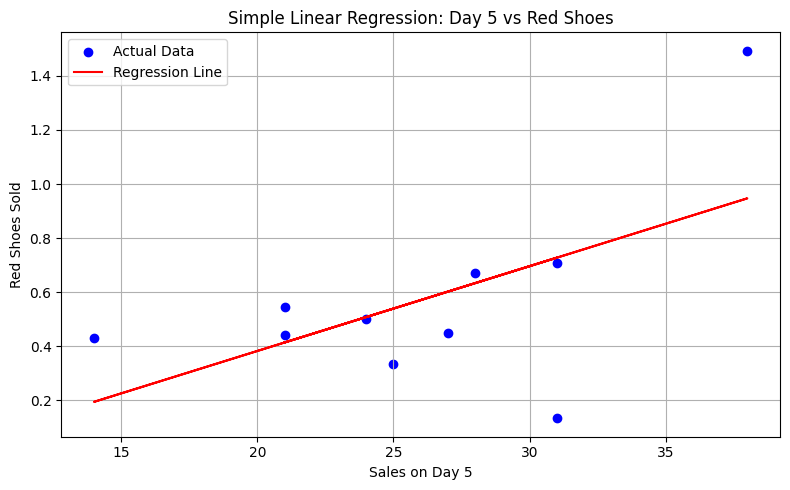

Equation: RedShoes ≈ 0.03 × Day5 + -0.24
R² score: 0.331
RMSE: 0.281


In [ ]:
#dado que los scores 5 tienen relevancia, aplicamos regresion lineal
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# 1. Define X and y
X_score_5 = df_scores[[5]]  # 2D array for sklearn
y_porcentaje = df_scores['Porcentaje_contagiado']

# 2. Train the model
simple_model = LinearRegression()
simple_model.fit(X_score_5, y_porcentaje)

# 3. Predict
y_pred = simple_model.predict(X_score_5)

# 4. Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_score_5, y_porcentaje, color="blue", label="Actual Data")
plt.plot(X_score_5, y_pred, color="red", label="Regression Line")
plt.xlabel("Sales on Day 5")
plt.ylabel("Red Shoes Sold")
plt.title("Simple Linear Regression: Day 5 vs Red Shoes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Optional: Print regression equation
slope = simple_model.coef_[0]
intercept = simple_model.intercept_
print(f"Equation: RedShoes ≈ {slope:.2f} × Day5 + {intercept:.2f}")

# Predict again using the model
y_pred = simple_model.predict(X_score_5)

# Calculate R² and RMSE
r2 = r2_score(y_porcentaje, y_pred)
rmse = root_mean_squared_error(y_porcentaje, y_pred)

print(f"R² score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

#podemos concluir que hay correación entre palabras positivas y casos